# Examining ratings concentration
### data downloaded fro https://data.world/muni-finance/credit-ratings-history-data/workspace/file?filename=ratings_for_upload.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Data can be queried directly using python wrapper for data.world (https://github.com/datadotworld/data.world-py) but due to size, I downloaded relevant data locally.  Code below reads in data on all ABS ratings and plots number of new ratings issued by year and rating agency

In [3]:
def get_counts(ratings):
    years = ratings["rating year"].unique()
    agencies = ratings["rating_agency_name"].unique()
    ratings_count = pd.DataFrame(index=years, columns=agencies)

    for agency in agencies:
        for year in years:
            df = ratings[(ratings["rating year"]==year) & (ratings["rating_agency_name"]==agency)
                           & (ratings["rating_action_class"]=="NW")]
            # Limiting DBRS to New Ratings to prevent double counting 
            if agency=='DBRS':
                ratings_count[agency][year] = len(df[df["other_announcement_type"]=="New Rating"])
            else:
                ratings_count[agency][year] = len(df)
        
    return ratings_count

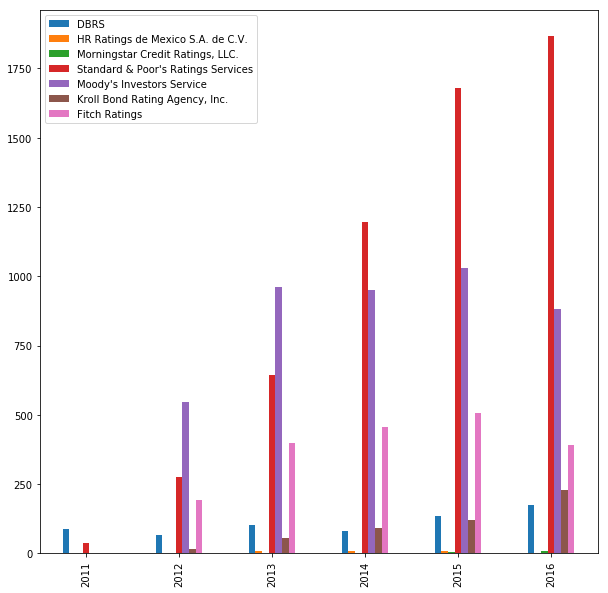

In [4]:
other_abs = pd.read_csv("other abs.csv")
other_abs["rating year"] = other_abs["rating_action_date"].apply(lambda x: int(x.split("-")[0]))

other_abs_count = get_counts(other_abs).sort_index()

#dropping pre-reporting years and years where data is incomplete
other_abs_count = other_abs_count.drop([2003,2004,2005,2006,2007,2008,2009,2010,2017])
other_abs_count.plot(figsize=(10,10), kind="bar")

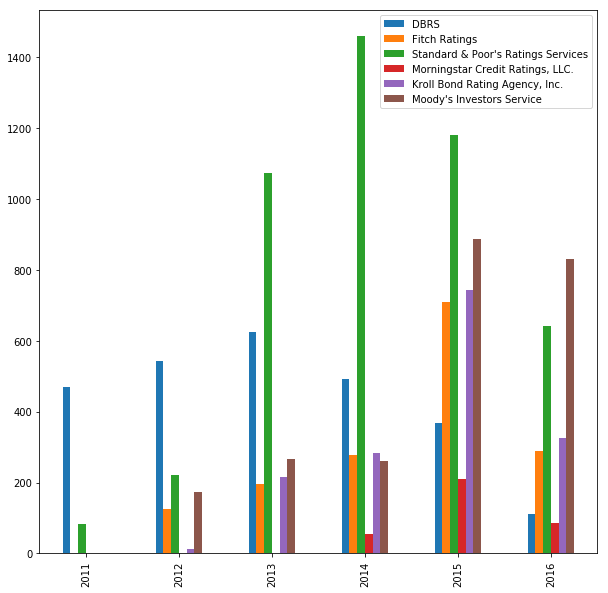

In [5]:
rmbs = pd.read_csv("rmbs.csv")
rmbs["rating year"] = rmbs["rating_action_date"].apply(lambda x: int(x.split("-")[0]))

rmbs_count = get_counts(rmbs).sort_index()
#dropping pre-crisis years and where data is incomplete
rmbs_count = rmbs_count.drop([2004,2005,2006,2007,2008,2009,2010])
rmbs_count.plot(figsize=(10,10), kind='bar')